In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import os
import gc
import anndata as ad
os.chdir('/home/aih/shrey.parikh/PDAC/PDAC/processed_datasets/')

In [4]:
# Concat Lin

In [18]:
class Concat:
    def __init__(self, base_path, output_file, dataset_name):
        self.base_path = base_path
        self.output_file = output_file
        self.dataset_name = dataset_name
        self.ann_data_list = []
        self.process_directories()
        
    def process_directories(self):
        highly_variable_genes = None 
        for root, dirs, files in os.walk(self.base_path):
            for file in files:
                if file.endswith(".h5ad"):
                    file_path = os.path.join(root, file)
                    print(f"Loading Anndata: {file_path}")
                    adata = self.load_anndata(file_path)
                    print("Adding Metadata")
                    self.add_metadata(adata, root)
                    # print('Calculating HVGs')
                    # self.calculate_HVGs(adata)
                    self.ann_data_list.append(adata)
        print(self.ann_data_list)            
        print('Concatinating Datasets')
        self.concat_and_save()

    def load_anndata(self, file_path):
        return sc.read_h5ad(file_path)

    def add_metadata(self, adata, directory_name):
        print('Changing Var Index')
        adata.var['1'] = adata.var['1'].astype(str)
        adata.var.index = adata.var['1']
        adata.var_names_make_unique()
        # Extracting directory name from the path
        directory_name = os.path.basename(directory_name)
        # Adding columns to adata.obs
        adata.obs['ID'] = directory_name
        adata.obs['Dataset'] = self.dataset_name

    # def calculate_HVGs(self, adata):
    #     sc.pp.normalize_total(adata, target_sum=1e4)
    #     sc.pp.log1p(adata)
    #     sc.pp.highly_variable_genes(adata, n_top_genes=3000)
    #     adata._inplace_subset_var(adata.var['highly_variable'])
    
    def concat_and_save(self):
        if self.ann_data_list:
            concatenated_anndata = ad.concat(self.ann_data_list, join='outer', fill_value=0)
            concatenated_anndata.write_h5ad(self.output_file)


In [19]:
Lin = Concat(base_path='/lustre/groups/ml01/workspace/shrey.parikh/PDAC/raw_data/Lin', 
                 output_file='/lustre/groups/ml01/workspace/shrey.parikh/PDAC/raw_data/Lin/Lin_concat.h5ad', dataset_name='Lin')

Loading Anndata: /lustre/groups/ml01/workspace/shrey.parikh/PDAC/raw_data/Lin/GSM4679533/GSM4679533_output.h5ad
Adding Metadata
Changing Var Index
Loading Anndata: /lustre/groups/ml01/workspace/shrey.parikh/PDAC/raw_data/Lin/GSM4679541/GSM4679541_output.h5ad
Adding Metadata
Changing Var Index
Loading Anndata: /lustre/groups/ml01/workspace/shrey.parikh/PDAC/raw_data/Lin/GSM4679532/GSM4679532_output.h5ad
Adding Metadata
Changing Var Index
Loading Anndata: /lustre/groups/ml01/workspace/shrey.parikh/PDAC/raw_data/Lin/GSM4679546/GSM4679546_output.h5ad
Adding Metadata
Changing Var Index
Loading Anndata: /lustre/groups/ml01/workspace/shrey.parikh/PDAC/raw_data/Lin/GSM4679536/GSM4679536_output.h5ad
Adding Metadata
Changing Var Index
Loading Anndata: /lustre/groups/ml01/workspace/shrey.parikh/PDAC/raw_data/Lin/GSM4679547/GSM4679547_output.h5ad
Adding Metadata
Changing Var Index
Loading Anndata: /lustre/groups/ml01/workspace/shrey.parikh/PDAC/raw_data/Lin/GSM4679535/GSM4679535_output.h5ad
Adding

In [2]:
peng_PDAC = sc.read_h5ad('All_genes/Peng_PDAC.h5ad')

ding_PDAC = sc.read_h5ad('All_genes/Ding_PDAC.h5ad')

Lee_PDAC = sc.read_h5ad('All_genes/Lee_concat_PDAC.h5ad')

regev_PDAC = sc.read_h5ad('All_genes/Regev_PDAC.h5ad')

simeone_PDAC = sc.read_h5ad('All_genes/Simeone_concat.h5ad')

steele_PDAC = sc.read_h5ad('All_genes/Steele_concat_PDAC.h5ad')

caronni_PDAC = sc.read_h5ad('All_genes/Caronni_concat.h5ad')

zhang_PDAC = sc.read_h5ad('All_genes/Zhang_concat_PDAC.h5ad')

zenodo_PDAC = sc.read_h5ad('All_genes/zenodo_PDAC_new.h5ad')

lin_PDAC = sc.read_h5ad('All_genes/Lin_concat.h5ad')

schlesinger_PDAC = sc.read_h5ad('All_genes/Schlesinger.h5ad')

steele_adj_norm = sc.read_h5ad('Healthy/Steele_adj_norm.h5ad')

peng_normal = sc.read_h5ad('Healthy/Peng_Normal.h5ad')

adata_list = [ding_PDAC, Lee_PDAC, regev_PDAC, simeone_PDAC, steele_PDAC, peng_PDAC, caronni_PDAC, zhang_PDAC, zenodo_PDAC, lin_PDAC, schlesinger_PDAC, steele_adj_norm, peng_normal]

schlesinger_PDAC.obs['ID'] = 'GSM4293555'
schlesinger_PDAC.obs['Dataset'] = 'Schlesinger'

/home/aih/shrey.parikh/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/aih/shrey.parikh/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/aih/shrey.parikh/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/aih/shrey.parikh/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/aih/shrey.parikh/miniconda

In [3]:
for adata in adata_list:
    adata.layers['raw'] = adata.X.copy()

In [33]:
keys=['Ding', 'Lee', 'Regev', 'Simeone', 'Steele', 'Peng', 'Caronni', 'Zhang', 'Zenodo', 'Lin', 'Schlesinger', 'Steel_Adj_Norm', 'Peng_Normal']
for adata,key in zip(adata_list, keys):
    print(f'Accounting for {key}')
    # print(np.isnan(adata.X.toarray()).any())
    adata.layers['raw'] = adata.X
    raw_counts = adata.layers['raw'].toarray()
    
    # Check if the data are integer value
    # print(f"Dataset: {adata}")
    print(f"Are raw counts integers? {np.all(raw_counts.astype(int) == raw_counts)}")

    # Check some basic statistics
    print(f"Mean raw counts: {np.mean(raw_counts)}")
    print(f"Range of raw counts: {np.min(raw_counts)} to {np.max(raw_counts)}")
    print(f"Percentage of zero counts: {np.mean(raw_counts == 0) * 100:.2f}%")
    print("-" * 50)
    del adata

    gc.collect()

Accounting for Ding
Are raw counts integers? True
Mean raw counts: 0.18831981718540192
Range of raw counts: 0.0 to 9161.0
Percentage of zero counts: 93.08%
--------------------------------------------------
Accounting for Lee
Are raw counts integers? True
Mean raw counts: 0.23658040009758993
Range of raw counts: 0 to 10764
Percentage of zero counts: 92.73%
--------------------------------------------------
Accounting for Regev
Are raw counts integers? False
Mean raw counts: 0.12677936255931854
Range of raw counts: 0.0 to 8.281750679016113
Percentage of zero counts: 92.94%
--------------------------------------------------
Accounting for Simeone
Are raw counts integers? True
Mean raw counts: 0.22694962940440574
Range of raw counts: 0 to 39043
Percentage of zero counts: 92.78%
--------------------------------------------------
Accounting for Steele
Are raw counts integers? True
Mean raw counts: 0.4854106784778597
Range of raw counts: 0 to 27120
Percentage of zero counts: 88.51%
---------

# regev layers['raw'] is actually not raw

In [13]:
# Check if counts is raw 
raw_counts = regev_PDAC.layers['counts'].toarray()
print(f"Are raw counts integers? {np.all(raw_counts.astype(int) == raw_counts)}")

# Check some basic statistics
print(f"Mean raw counts: {np.mean(raw_counts)}")
print(f"Range of raw counts: {np.min(raw_counts)} to {np.max(raw_counts)}")
print(f"Percentage of zero counts: {np.mean(raw_counts == 0) * 100:.2f}%")
print("-" * 50)

Are raw counts integers? True
Mean raw counts: 0.13416031002998352
Range of raw counts: 0.0 to 2294.0
Percentage of zero counts: 92.94%
--------------------------------------------------


In [4]:
regev_PDAC.layers['raw'] = regev_PDAC.layers['counts'].copy()

# add the steele_adj_norm raw counts

In [5]:
steele_adj_norm_raw = sc.read_h5ad('Healthy/Steele_adj_norm_raw.h5ad')
steele_adj_norm.layers['raw'] = steele_adj_norm_raw.layers['raw'].copy()
raw_counts = steele_adj_norm.layers['raw'].toarray()
print(f"Are raw counts integers? {np.all(raw_counts.astype(int) == raw_counts)}")

# Check some basic statistics
print(f"Mean raw counts: {np.mean(raw_counts)}")
print(f"Range of raw counts: {np.min(raw_counts)} to {np.max(raw_counts)}")
print(f"Percentage of zero counts: {np.mean(raw_counts == 0) * 100:.2f}%")
print("-" * 50)

/home/aih/shrey.parikh/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Are raw counts integers? True
Mean raw counts: 0.4690208208206941
Range of raw counts: 0 to 159376
Percentage of zero counts: 95.66%
--------------------------------------------------


# add the Peng_normal raw counts

In [6]:
peng_normal_raw = sc.read_h5ad('../processed_datasets/Healthy/Peng_Normal_raw.h5ad')
peng_normal.layers['raw'] = peng_normal_raw.layers['raw'].copy()

raw_counts = peng_normal.layers['raw'].toarray()
print(f"Are raw counts integers? {np.all(raw_counts.astype(int) == raw_counts)}")

# Check some basic statistics
print(f"Mean raw counts: {np.mean(raw_counts)}")
print(f"Range of raw counts: {np.min(raw_counts)} to {np.max(raw_counts)}")
print(f"Percentage of zero counts: {np.mean(raw_counts == 0) * 100:.2f}%")
print("-" * 50)

Are raw counts integers? True
Mean raw counts: 0.35866761207580566
Range of raw counts: 0.0 to 38145.0
Percentage of zero counts: 88.53%
--------------------------------------------------


# check the same of zenodo original dataset

In [14]:
zenodo = sc.read_h5ad('/ictstr01/groups/ml01/workspace/shrey.parikh/PDAC/raw_data/Zenodo/Data/pk_all.h5ad')

# checked in the rds file, no raw counts anywhere

In [17]:
raw_counts = zenodo.X.toarray()
print(f"Are raw counts integers? {np.all(raw_counts.astype(int) == raw_counts)}")

# Check some basic statistics
print(f"Mean raw counts: {np.mean(raw_counts)}")
print(f"Range of raw counts: {np.min(raw_counts)} to {np.max(raw_counts)}")
print(f"Percentage of zero counts: {np.mean(raw_counts == 0) * 100:.2f}%")
print("-" * 50)

Are raw counts integers? False
Mean raw counts: 0.08614287632716253
Range of raw counts: 0.0 to 9.002054242308615
Percentage of zero counts: 93.54%
--------------------------------------------------


In [7]:
keys=['Ding', 'Lee', 'Regev', 'Simeone', 'Steele', 'Peng', 'Caronni', 'Zhang', 'Zenodo', 'Lin', 'Schlesinger', 'Steel_Adj_Norm', 'Peng_Normal']
for adata,key in zip(adata_list, keys):
    print(f'Accounting for {key}')
    # print(np.isnan(adata.X.toarray()).any())
    # adata.layers['raw'] = adata.X
    raw_counts = adata.layers['raw'].toarray()
    
    # Check if the data are integer value
    # print(f"Dataset: {adata}")
    print(f"Are raw counts integers? {np.all(raw_counts.astype(int) == raw_counts)}")

    # Check some basic statistics
    print(f"Mean raw counts: {np.mean(raw_counts)}")
    print(f"Range of raw counts: {np.min(raw_counts)} to {np.max(raw_counts)}")
    print(f"Percentage of zero counts: {np.mean(raw_counts == 0) * 100:.2f}%")
    print("-" * 50)
    del adata
    del raw_counts
    gc.collect()

Accounting for Ding
Are raw counts integers? True
Mean raw counts: 0.18831981718540192
Range of raw counts: 0.0 to 9161.0
Percentage of zero counts: 93.08%
--------------------------------------------------
Accounting for Lee
Are raw counts integers? True
Mean raw counts: 0.23658040009758993
Range of raw counts: 0 to 10764
Percentage of zero counts: 92.73%
--------------------------------------------------
Accounting for Regev
Are raw counts integers? True
Mean raw counts: 0.13416031002998352
Range of raw counts: 0.0 to 2294.0
Percentage of zero counts: 92.94%
--------------------------------------------------
Accounting for Simeone
Are raw counts integers? True
Mean raw counts: 0.22694962940440574
Range of raw counts: 0 to 39043
Percentage of zero counts: 92.78%
--------------------------------------------------
Accounting for Steele
Are raw counts integers? True
Mean raw counts: 0.4854106784778597
Range of raw counts: 0 to 27120
Percentage of zero counts: 88.51%
---------------------

# removing zenodo for now

In [8]:
adata_list = [ding_PDAC, Lee_PDAC, regev_PDAC, simeone_PDAC, steele_PDAC, peng_PDAC, caronni_PDAC, zhang_PDAC, lin_PDAC, schlesinger_PDAC, steele_adj_norm, peng_normal]

In [9]:
# adata_concat = ad.concat(adata_list, join='outer', fill_value=0)
adata_concat = ad.concat(
    adata_list, 
    axis=0, 
    join='outer', 
    label='batch', 
    keys=['Ding', 'Lee', 'Regev', 'Simeone', 'Steele', 'Peng', 'Caronni', 'Zhang', 'Lin', 'Schlesinger', 'Steele_Adj_Norm', 'Peng_Norm'], 
    index_unique=None,
    fill_value=0
)


/home/aih/shrey.parikh/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/_core/merge.py:1362: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(
/home/aih/shrey.parikh/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [10]:
adata_concat.write('All_genes/Concat_All_Genes.h5ad')

In [11]:
adata_subset = sc.pp.subsample(adata_concat, fraction=0.1, copy=True)
raw_counts = adata_subset.layers['raw'].toarray()
print(f"Are raw counts integers? {np.all(raw_counts.astype(int) == raw_counts)}")
# print(f"Mean raw counts: {np.mean(raw_counts)}")
print(f"Range of raw counts: {np.min(raw_counts)} to {np.max(raw_counts)}")
# print(f"Percentage of zero counts: {np.mean(raw_counts == 0) * 100:.2f}%")
print("-" * 50)

/home/aih/shrey.parikh/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Are raw counts integers? True
Range of raw counts: 0.0 to 137511.0
--------------------------------------------------


In [2]:
adata_concat = sc.read_h5ad('All_genes/Concat_All_Genes.h5ad')

/home/aih/shrey.parikh/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [ ]:
sc.pp.filter_genes(adata_concat, min_cells=5)

adata_concat.var_names[adata_concat.var_names.str.contains('class')]

In [14]:
keys=['Ding', 'Lee', 'Regev', 'Simeone', 'Steele', 'Peng', 'Caronni', 'Zhang', 'Zenodo', 'Lin', 'Schlesinger', 'Steel_Adj_Norm', 'Peng_Normal']

In [21]:
for key,adata in zip(keys,adata_list):
    if adata.var_names.str.contains('class').any():
        print(key)

Peng
Zenodo
Peng_Normal


# < class > in var_names whatever is also in the peng raw so just remove it

In [4]:
adata_concat = adata_concat[:, ~adata_concat.var_names.str.contains('class')]

In [5]:
adata_concat.write('All_genes/Concat_All_Genes_filtered.h5ad')

In [3]:
pwd

'/ictstr01/home/aih/shrey.parikh/PDAC/PDAC/processed_datasets'

In [2]:
adata_concat = sc.read_h5ad('All_genes/Concat_All_Genes_filtered.h5ad')

/home/aih/shrey.parikh/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [8]:
adata_subset = sc.pp.subsample(adata_concat, fraction=0.1, copy=True)
raw_counts = adata_subset.layers['raw'].toarray()

# Check if the data are integer value
# print(f"Dataset: {adata}")
print(f"Are raw counts integers? {np.all(raw_counts.astype(int) == raw_counts)}")

# Check some basic statistics
print(f"Mean raw counts: {np.mean(raw_counts)}")
print(f"Range of raw counts: {np.min(raw_counts)} to {np.max(raw_counts)}")
print(f"Percentage of zero counts: {np.mean(raw_counts == 0) * 100:.2f}%")
print("-" * 50)
del adata_subset
gc.collect()

/home/aih/shrey.parikh/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Are raw counts integers? True
Mean raw counts: 0.14306889794920455
Range of raw counts: 0.0 to 137511.0
Percentage of zero counts: 95.33%
--------------------------------------------------


3082

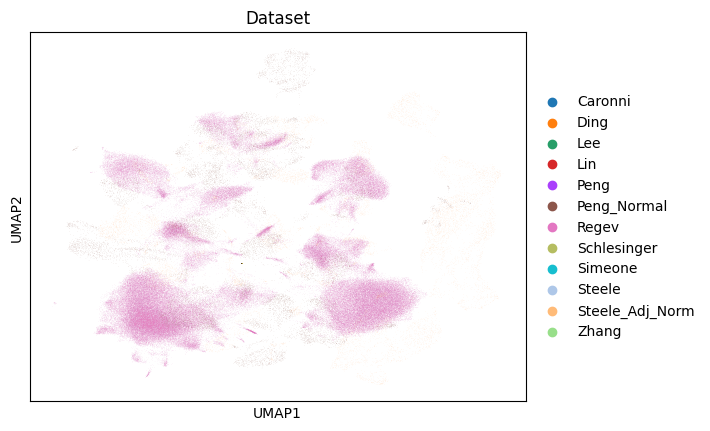

In [27]:
sc.pl.umap(adata_filtered, color='Dataset')

In [3]:
from scipy.stats import median_abs_deviation
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
adata_filtered = adata_concat

In [5]:
sc.pp.calculate_qc_metrics(adata_filtered, layer='raw', inplace=True)

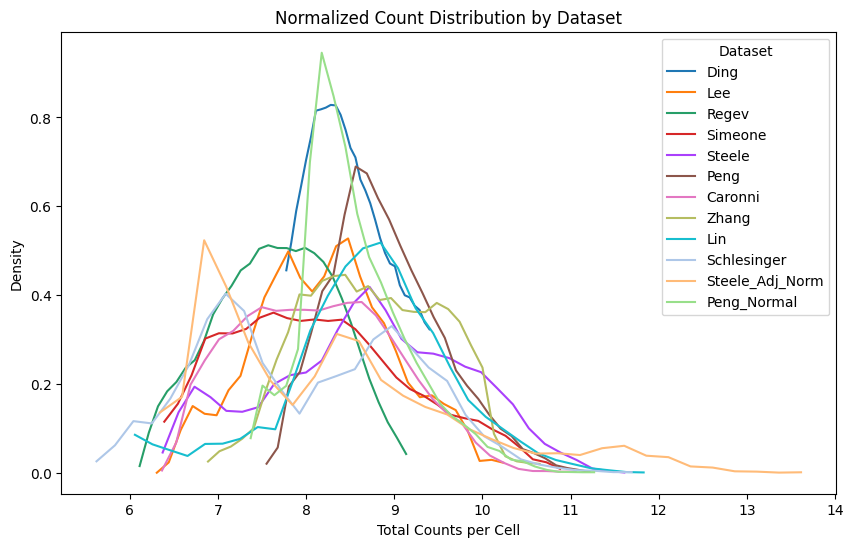

In [28]:
datasets = adata_filtered.obs['Dataset'].unique()
dataset_subsets = {ds: adata_filtered.obs[adata_filtered.obs['Dataset'] == ds] for ds in datasets}
counts = {ds: subset["log1p_total_counts"] for ds, subset in dataset_subsets.items()} 

fig, ax = plt.subplots(figsize=(10, 6))

colors = adata_filtered.uns['Dataset_colors']

for (ds, count_data), color in zip(counts.items(), colors):
    # Compute histogram data
    hist_data, bin_edges = np.histogram(count_data, bins=30, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Plot as a line
    ax.plot(bin_centers, hist_data, label=ds, color=color)

ax.set_xlabel('Total Counts per Cell')
ax.set_ylabel('Density')
ax.set_title('Normalized Count Distribution by Dataset')
ax.legend(title='Dataset')

plt.show()

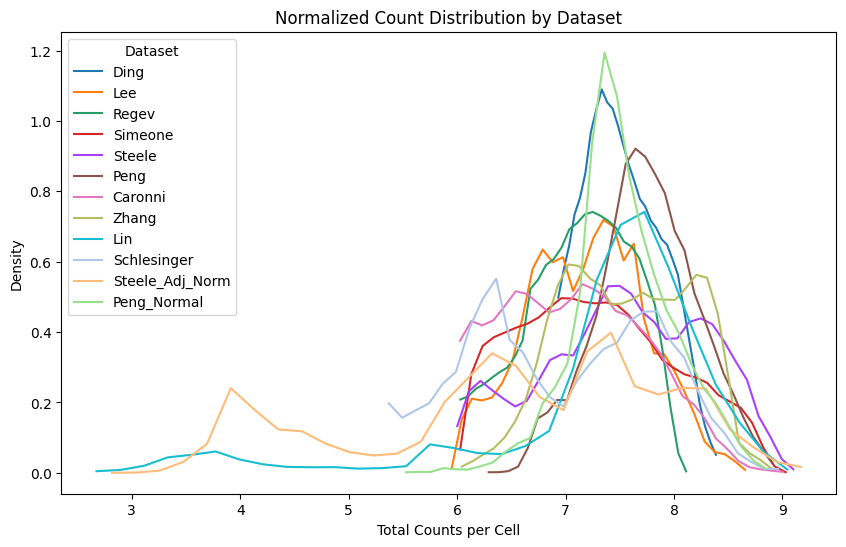

In [29]:
datasets = adata_filtered.obs['Dataset'].unique()
dataset_subsets = {ds: adata_filtered.obs[adata_filtered.obs['Dataset'] == ds] for ds in datasets}
counts = {ds: subset["log1p_n_genes_by_counts"] for ds, subset in dataset_subsets.items()} 

fig, ax = plt.subplots(figsize=(10, 6))

colors = adata_filtered.uns['Dataset_colors']

for (ds, count_data), color in zip(counts.items(), colors):
    # Compute histogram data
    hist_data, bin_edges = np.histogram(count_data, bins=30, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Plot as a line
    ax.plot(bin_centers, hist_data, label=ds, color=color)

ax.set_xlabel('Total Counts per Cell')
ax.set_ylabel('Density')
ax.set_title('Normalized Count Distribution by Dataset')
ax.legend(title='Dataset')

plt.show()

In [ ]:
datasets = adata_filtered.obs['Dataset'].unique()
num_datasets = len(datasets)

nrows = int(np.ceil(num_datasets / 3))
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()

for i, dataset in enumerate(datasets):
    dataset_mask = adata_filtered.obs['Dataset'] == dataset
    raw_counts = adata_filtered[dataset_mask].layers['raw'].toarray() if not isinstance(adata_filtered.layers['raw'], np.ndarray) else adata_filtered[dataset_mask].layers['raw']
    total_counts_per_cell = raw_counts.sum(axis=1)
    axes[i].hist(total_counts_per_cell, bins=50, color='blue', alpha=0.7)
    axes[i].set_title(f'{dataset} - Raw Counts')
    axes[i].set_xlabel('Total Counts per Cell')
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [9]:
import scanpy as sc
import numpy as np

In [2]:
pwd

'/ictstr01/home/aih/shrey.parikh/PDAC/PDAC_Final/Notebooks'

In [3]:
adata_hcg = sc.read_h5ad('../../PDAC/processed_datasets/Concat_HVG_filtered.h5ad')

/home/aih/shrey.parikh/miniconda3/envs/scanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [10]:
ding_sn_map = ['HT224P1',
 'HT231P1',
 'HT232P1',
 'HT242P1',
 'HT259P1',
 'HT264P1',
 'HT270P1',
 'HT284P1',
 'HT288P1',
 'HT306P1',
 'HT412P1']
adata_hcg.obs.Dataset = np.where(adata_hcg.obs.ID.isin(ding_sn_map), 'Ding_snRNA-seq', adata_hcg.obs.Dataset)

In [11]:
adata_hcg.obs.groupby('Dataset').size()

Dataset
Caronni             75280
Ding               152124
Ding_snRNA-seq      59014
Lee                  8897
Lin                 17086
Peng                41964
Peng_Normal         15544
Regev              192044
Schlesinger          6499
Simeone            213711
Steele              37218
Steele_Adj_Norm     10903
Zhang               37934
dtype: int64

In [12]:
adata_hcg.obs['batch_covariate'] = adata_hcg.obs['Dataset'].astype(str) + '_' + adata_hcg.obs['Condition'].astype(str)
adata_hcg.obs.batch_covariate = adata_hcg.obs.batch_covariate.replace('Ding_snRNA-seq_snRNA-seq',  'Ding_snRNA-seq')

In [13]:
adata_hcg.obs.groupby('batch_covariate').size()

batch_covariate
Caronni_scRNA-seq             75280
Ding_scRNA-seq               152124
Ding_snRNA-seq                59014
Lee_scRNA-seq                  8897
Lin_scRNA-seq                 17086
Peng_Normal_scRNA-seq         15544
Peng_scRNA-seq                41964
Regev_snRNA-seq              192044
Schlesinger_scRNA-seq          6499
Simeone_scRNA-seq            213711
Steele_Adj_Norm_scRNA-seq     10903
Steele_scRNA-seq              37218
Zhang_scRNA-seq               37934
dtype: int64

In [16]:
raw_counts = adata_hcg.X.toarray()
print(f"Are raw counts integers? {np.all(raw_counts.astype(int) == raw_counts)}")
print(f"Range of raw counts: {np.min(raw_counts)} to {np.max(raw_counts)}")
print("-" * 50)

Are raw counts integers? True
Range of raw counts: 0.0 to 159376.0
--------------------------------------------------


In [17]:
raw_counts = adata_hcg.layers['raw'].toarray()
print(f"Are raw counts integers? {np.all(raw_counts.astype(int) == raw_counts)}")
print(f"Range of raw counts: {np.min(raw_counts)} to {np.max(raw_counts)}")
print("-" * 50)

Are raw counts integers? True
Range of raw counts: 0.0 to 159376.0
--------------------------------------------------


In [18]:
adata_hcg.write('../../PDAC/drvi/adata_drvi.h5ad')

In [19]:
adata_hcg

AnnData object with n_obs × n_vars = 868218 × 3478
    obs: 'n_genes', 'ID', 'n_counts', 'log_counts', 'mt_frac', 'Dataset', 'sampleid', 'scrublet_scores', 'pid', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_counts_sat', 'n_genes_sat', 'percent_mito', 'leiden', 'batch', 'Moffitt_basal', 'Moffitt_classical', 'Bailey_squamous', 'Bailey_progenitor', 'Collison_QM', 'Collison_classical', 'MALIGNANT CELLS', 'ACINAR', 'Alpha', 'Beta', 'Delta', 'Gamma', 'Episilon', 'ENDOCRINE', 'ENDOTHELIAL', 'Pan_Immune', 'AntigenPresentingCells', 'Monocytes_1', 'Monocytes_2', 'Macrophage', 'cDC1', 'cDC2', 'DC_activated', 'pDC', 'Mast', 'Eosinophils', 'Neutrophils', 'M0', 'M1', 'M2', 'Mast_Resting', 'Mast_activated', 'CD8_Tcells', 'CD4_Tcells', 'NK', 'CD8_gammadelta', 'CD8_exhausted', 'CD4_naive', 'CD4_memory_resting', 'CD4_memory_activated', 'CD4_follicular_helper', 'CD4_regulatory', 'NK_resting', 'NK_activated', 'B_cell', 'Plasma', 'Bcell_naive', 'Bcell_memory', '